<a href="https://colab.research.google.com/github/rizkamars/Exploratory-Data-Analysis-Kekambuhan-Kanker-Tiroid-Berdiferensiasi/blob/main/EDA_Kanker_Tiroid_Berdiferensiasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence

Kumpulan data ini berisi 16 fitur klinikopatologis yang bertujuan untuk memprediksi kekambuhan kanker tiroid yang berdiferensiasi baik. Kumpulan data dikumpulkan dalam jangka waktu 15 tahun dan setiap pasien dipantau selama minimal 10 tahun.

# Import Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import math # Import the math module
from IPython.display import display, HTML
import re # Import the re (regular expressions) module
import itertools # Import the itertools module
from sklearn.preprocessing import LabelEncoder

In [ ]:
data=pd.read_csv('/content/Thyroid_Diff.csv')
data.head()

Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1  T1a  N0  M0     I      Excellent       No  
2  T1a  N0  M0     I      Excellent       No  
3  T1a  N0  M0     I      Excellent       No  
4  T1a  N0  M0     I      Excellent       No

# Inspection Data

In [ ]:
print(data.shape)

(383, 17)


In [ ]:
print(data.columns)

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
print(data.describe())

              Age
count  383.000000
mean    40.866841
std     15.134494
min     15.000000
25%     29.000000
50%     37.000000
75%     51.000000
max     82.000000


In [ ]:
print(data.isnull().sum())

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64


In [ ]:
print(data.duplicated().sum())

19


In [ ]:
data = data.drop_duplicates() #menghapus data duplikat
print(data.duplicated().sum())

0


# Explanatory Data Analysis (EDA)

Univariate Visual Analysis : Quantitative features

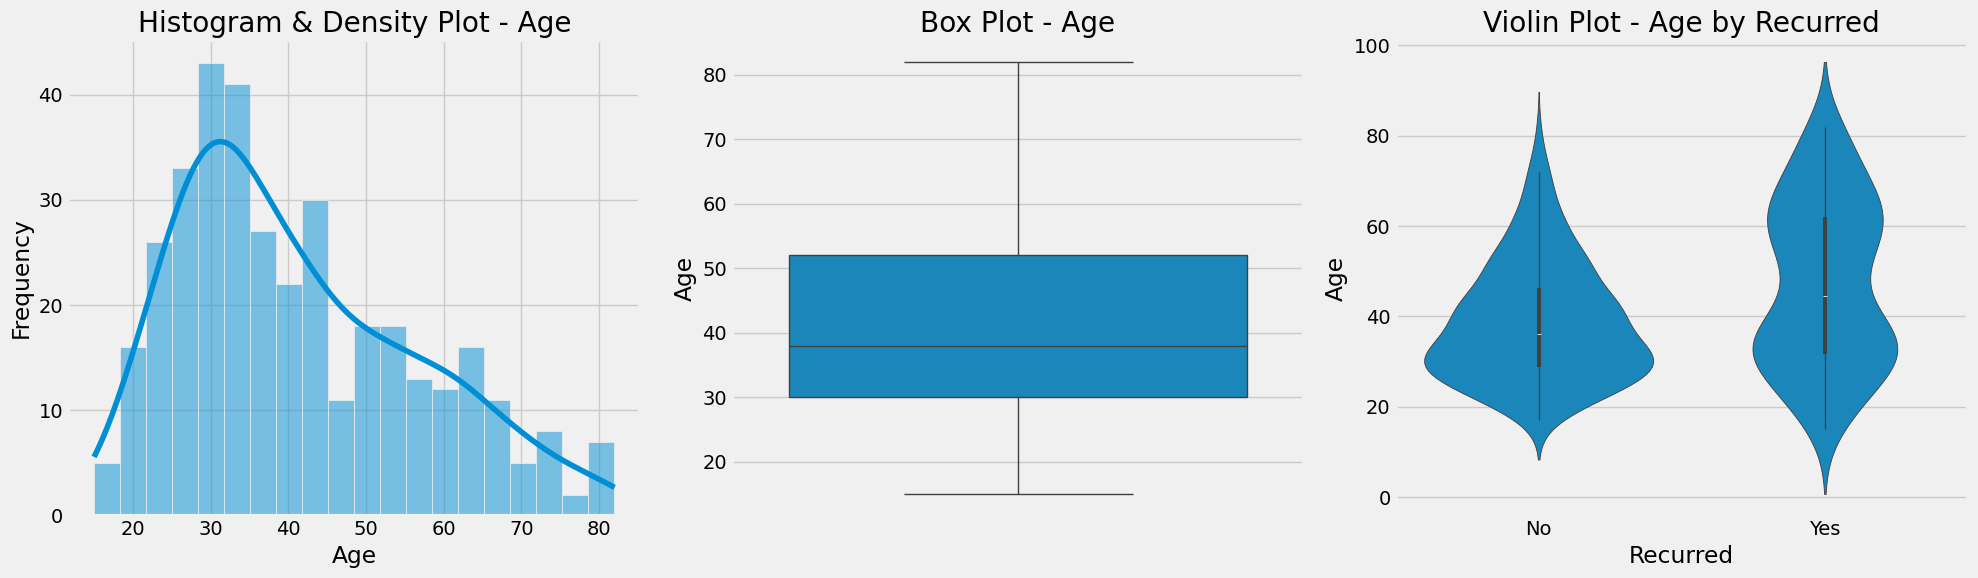

In [ ]:
# Buat 3 visualisasi dalam 1 baris
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Histogram + Density Plot untuk kolom 'Age'
sns.histplot(data["Age"], kde=True, bins=20, ax=axes[0])
axes[0].set_title("Histogram & Density Plot - Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")

# 2. Box Plot untuk 'Age'
sns.boxplot(y=data["Age"], ax=axes[1])
axes[1].set_title("Box Plot - Age")
axes[1].set_ylabel("Age")

# 3. Violin Plot untuk 'Age' berdasarkan 'Recurred'
sns.violinplot(x="Recurred", y="Age", data=data, ax=axes[2])
axes[2].set_title("Violin Plot - Age by Recurred")
axes[2].set_xlabel("Recurred")
axes[2].set_ylabel("Age")

# Tampilkan visualisasi
plt.tight_layout()
plt.show()

Univariate Visual Analysis :	Categorical and binary features

In [ ]:
selected_columns = ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']

# Simpan styled table hanya untuk kolom yang dipilih
styled_tables = [
    data[col].value_counts().to_frame().style
        .background_gradient(cmap='summer')
        .set_caption(f"Frequency Table: {col}")
    for col in selected_columns if col in data.columns
]

# Buat tampilan kisi 4x4 (karena ada 16 kolom)
rows, cols_per_row = 4, 4
table_html = "<table>"

for i in range(rows):
    table_html += "<tr>"
    for j in range(cols_per_row):
        idx = i * cols_per_row + j
        if idx < len(styled_tables):
            table_html += f"<td style='vertical-align: top; padding: 10px;'>{styled_tables[idx].to_html()}</td>"
        else:
            table_html += "<td></td>"
    table_html += "</tr>"

table_html += "</table>"

# Tampilkan sebagai HTML
display(HTML(table_html))


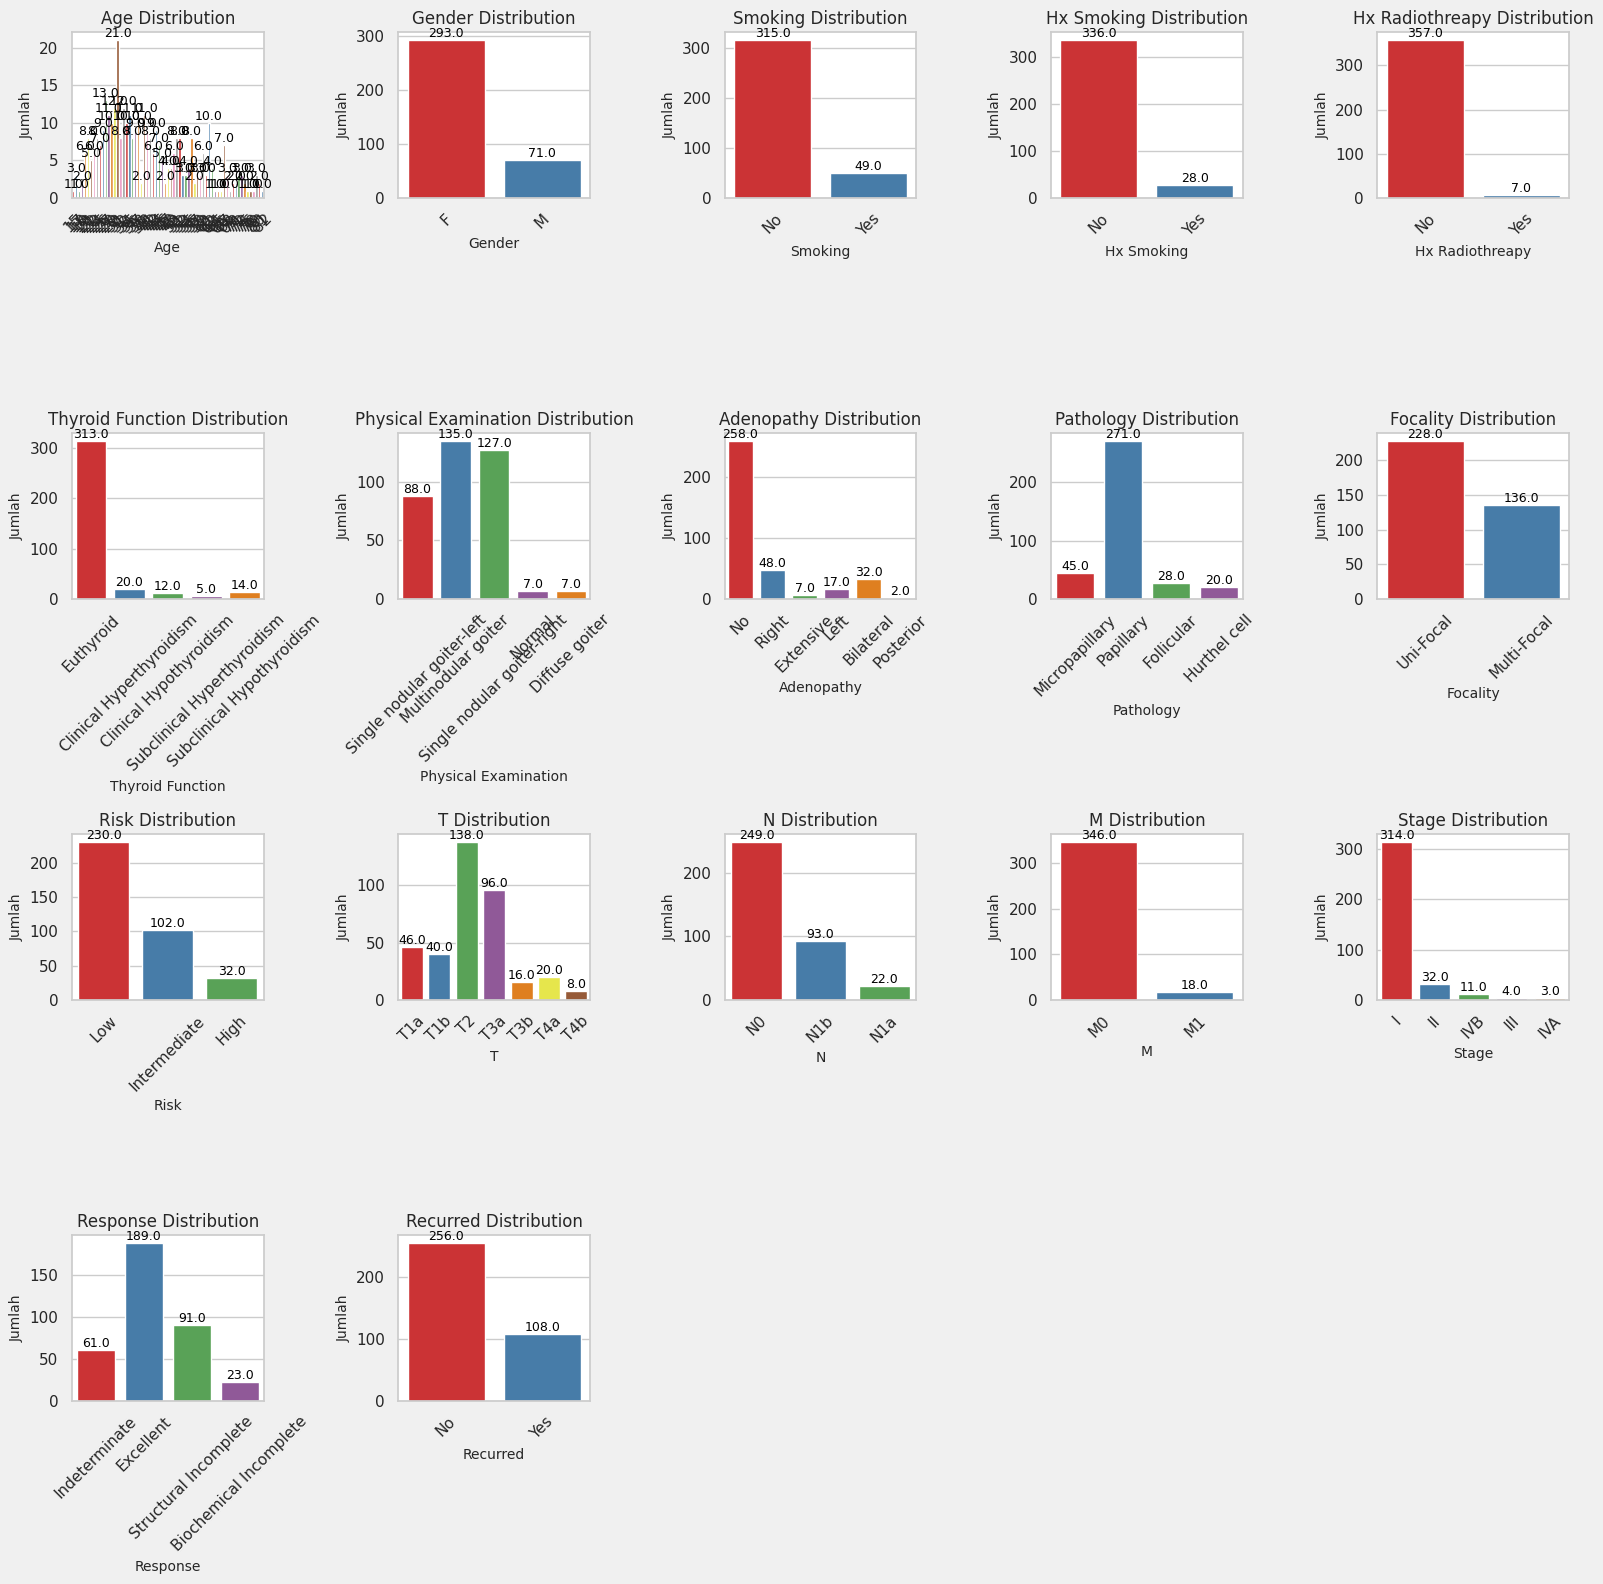

In [ ]:
categorical_cols = ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']

n_cols = 5
n_rows = math.ceil(len(categorical_cols) / n_cols)

plt.figure(figsize=(16, n_rows * 4))
sns.set(style="whitegrid")

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    ax = sns.countplot(x=col, data=data, palette='Set1')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, color='black')

    plt.title(f'{col} Distribution', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Jumlah', fontsize=10)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Multivariate visualization : Quantitative vs. Quantitative

In [ ]:
data_viz = data.copy()

# Kolom yang cocok untuk extract angka dari string
def extract_numeric(stage):
    match = re.search(r'\d+', str(stage))
    return int(match.group()) if match else None

# Terapkan extract_numeric hanya ke kolom yang memang punya angka di dalam string-nya
cols_with_numeric = ['T', 'N', 'M', 'Stage']

for col in cols_with_numeric:
    data_viz[col] = data_viz[col].apply(extract_numeric)

# Kolom kategorikal lain: Label Encoding (bukan extract numeric)
# Bisa disesuaikan jika ada yang ingin di-OneHotEncoding juga
cols_to_label_encode = [
    'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function',
    'Physical Examination', 'Adenopathy', 'Pathology', 'Focality',
    'Risk', 'Response', 'Recurred'
]

le = LabelEncoder()
for col in cols_to_label_encode:
    data_viz[col] = le.fit_transform(data_viz[col])


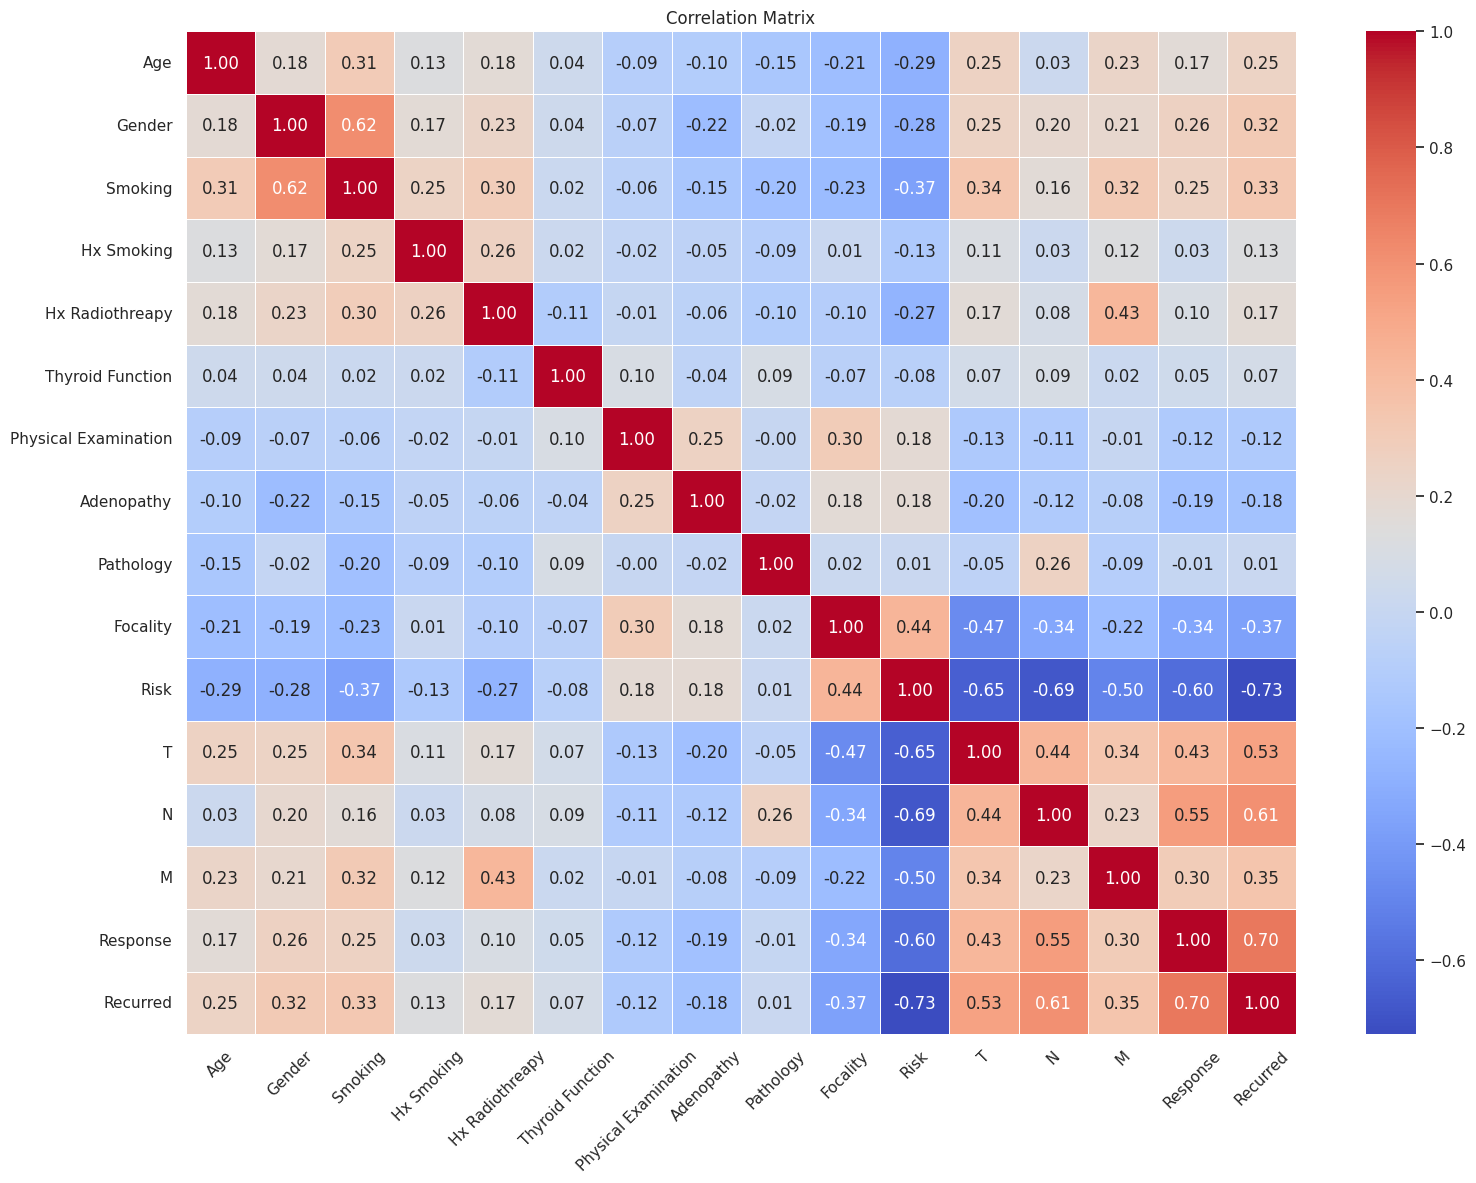

In [ ]:
# Hitung korelasi
corr_matrix = data_viz.corr(numeric_only=True)

# Visualisasi heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


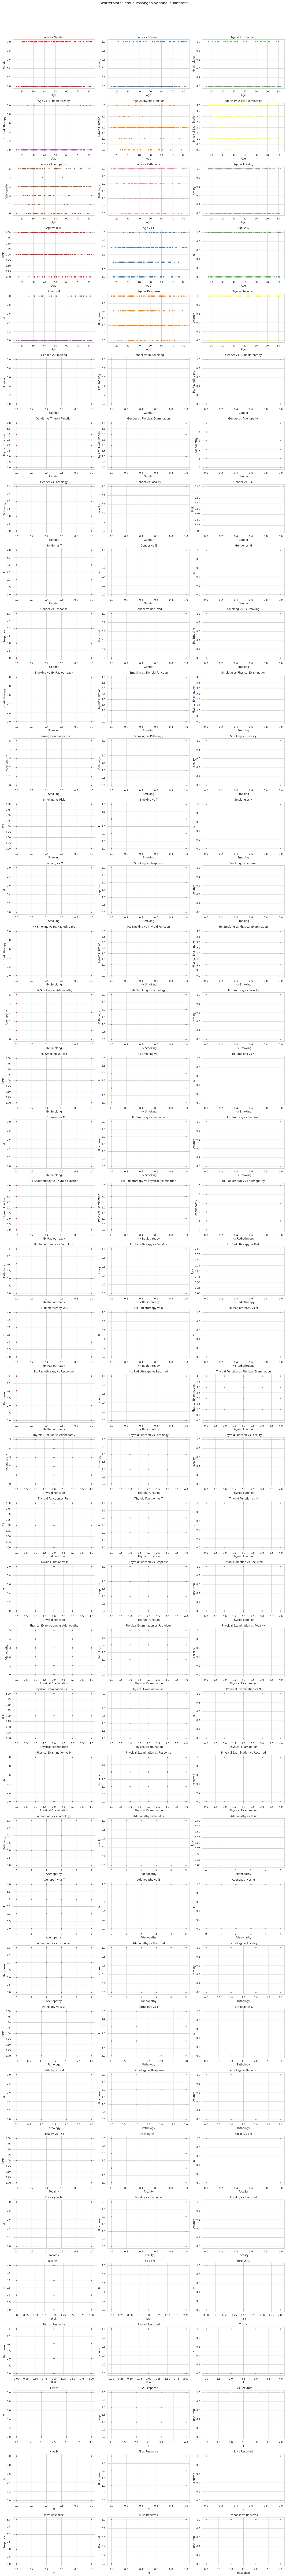

In [ ]:
# Daftar kolom numerik
quantitative_cols = data_viz.select_dtypes(include='number').columns.tolist()

# Semua pasangan kombinasi 2 variabel kuantitatif
pairs = list(itertools.combinations(quantitative_cols, 2))

# Ukuran grid plot
n_plots = len(pairs)
n_cols = 3  # misalnya 3 kolom
n_rows = math.ceil(n_plots / n_cols)

# Palet warna
colors = sns.color_palette("Set1", n_colors=n_plots)

# Buat figure dan axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))

# Flatten axes jika lebih dari 1 baris
axes = axes.flatten() if n_plots > 1 else [axes]

# Buat scatterplot untuk setiap pasangan
for ax, (color, (x, y)) in zip(axes, zip(colors, pairs)):
    sns.scatterplot(data=data_viz, x=x, y=y, ax=ax, color=color)
    ax.set_title(f"{x} vs {y}")
    ax.set_xlabel(x)
    ax.set_ylabel(y)

# Hapus sisa subplot kosong jika ada
for i in range(len(pairs), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("Scatterplots Semua Pasangan Variabel Kuantitatif", y=1.01, fontsize=16)
plt.tight_layout()
plt.show()

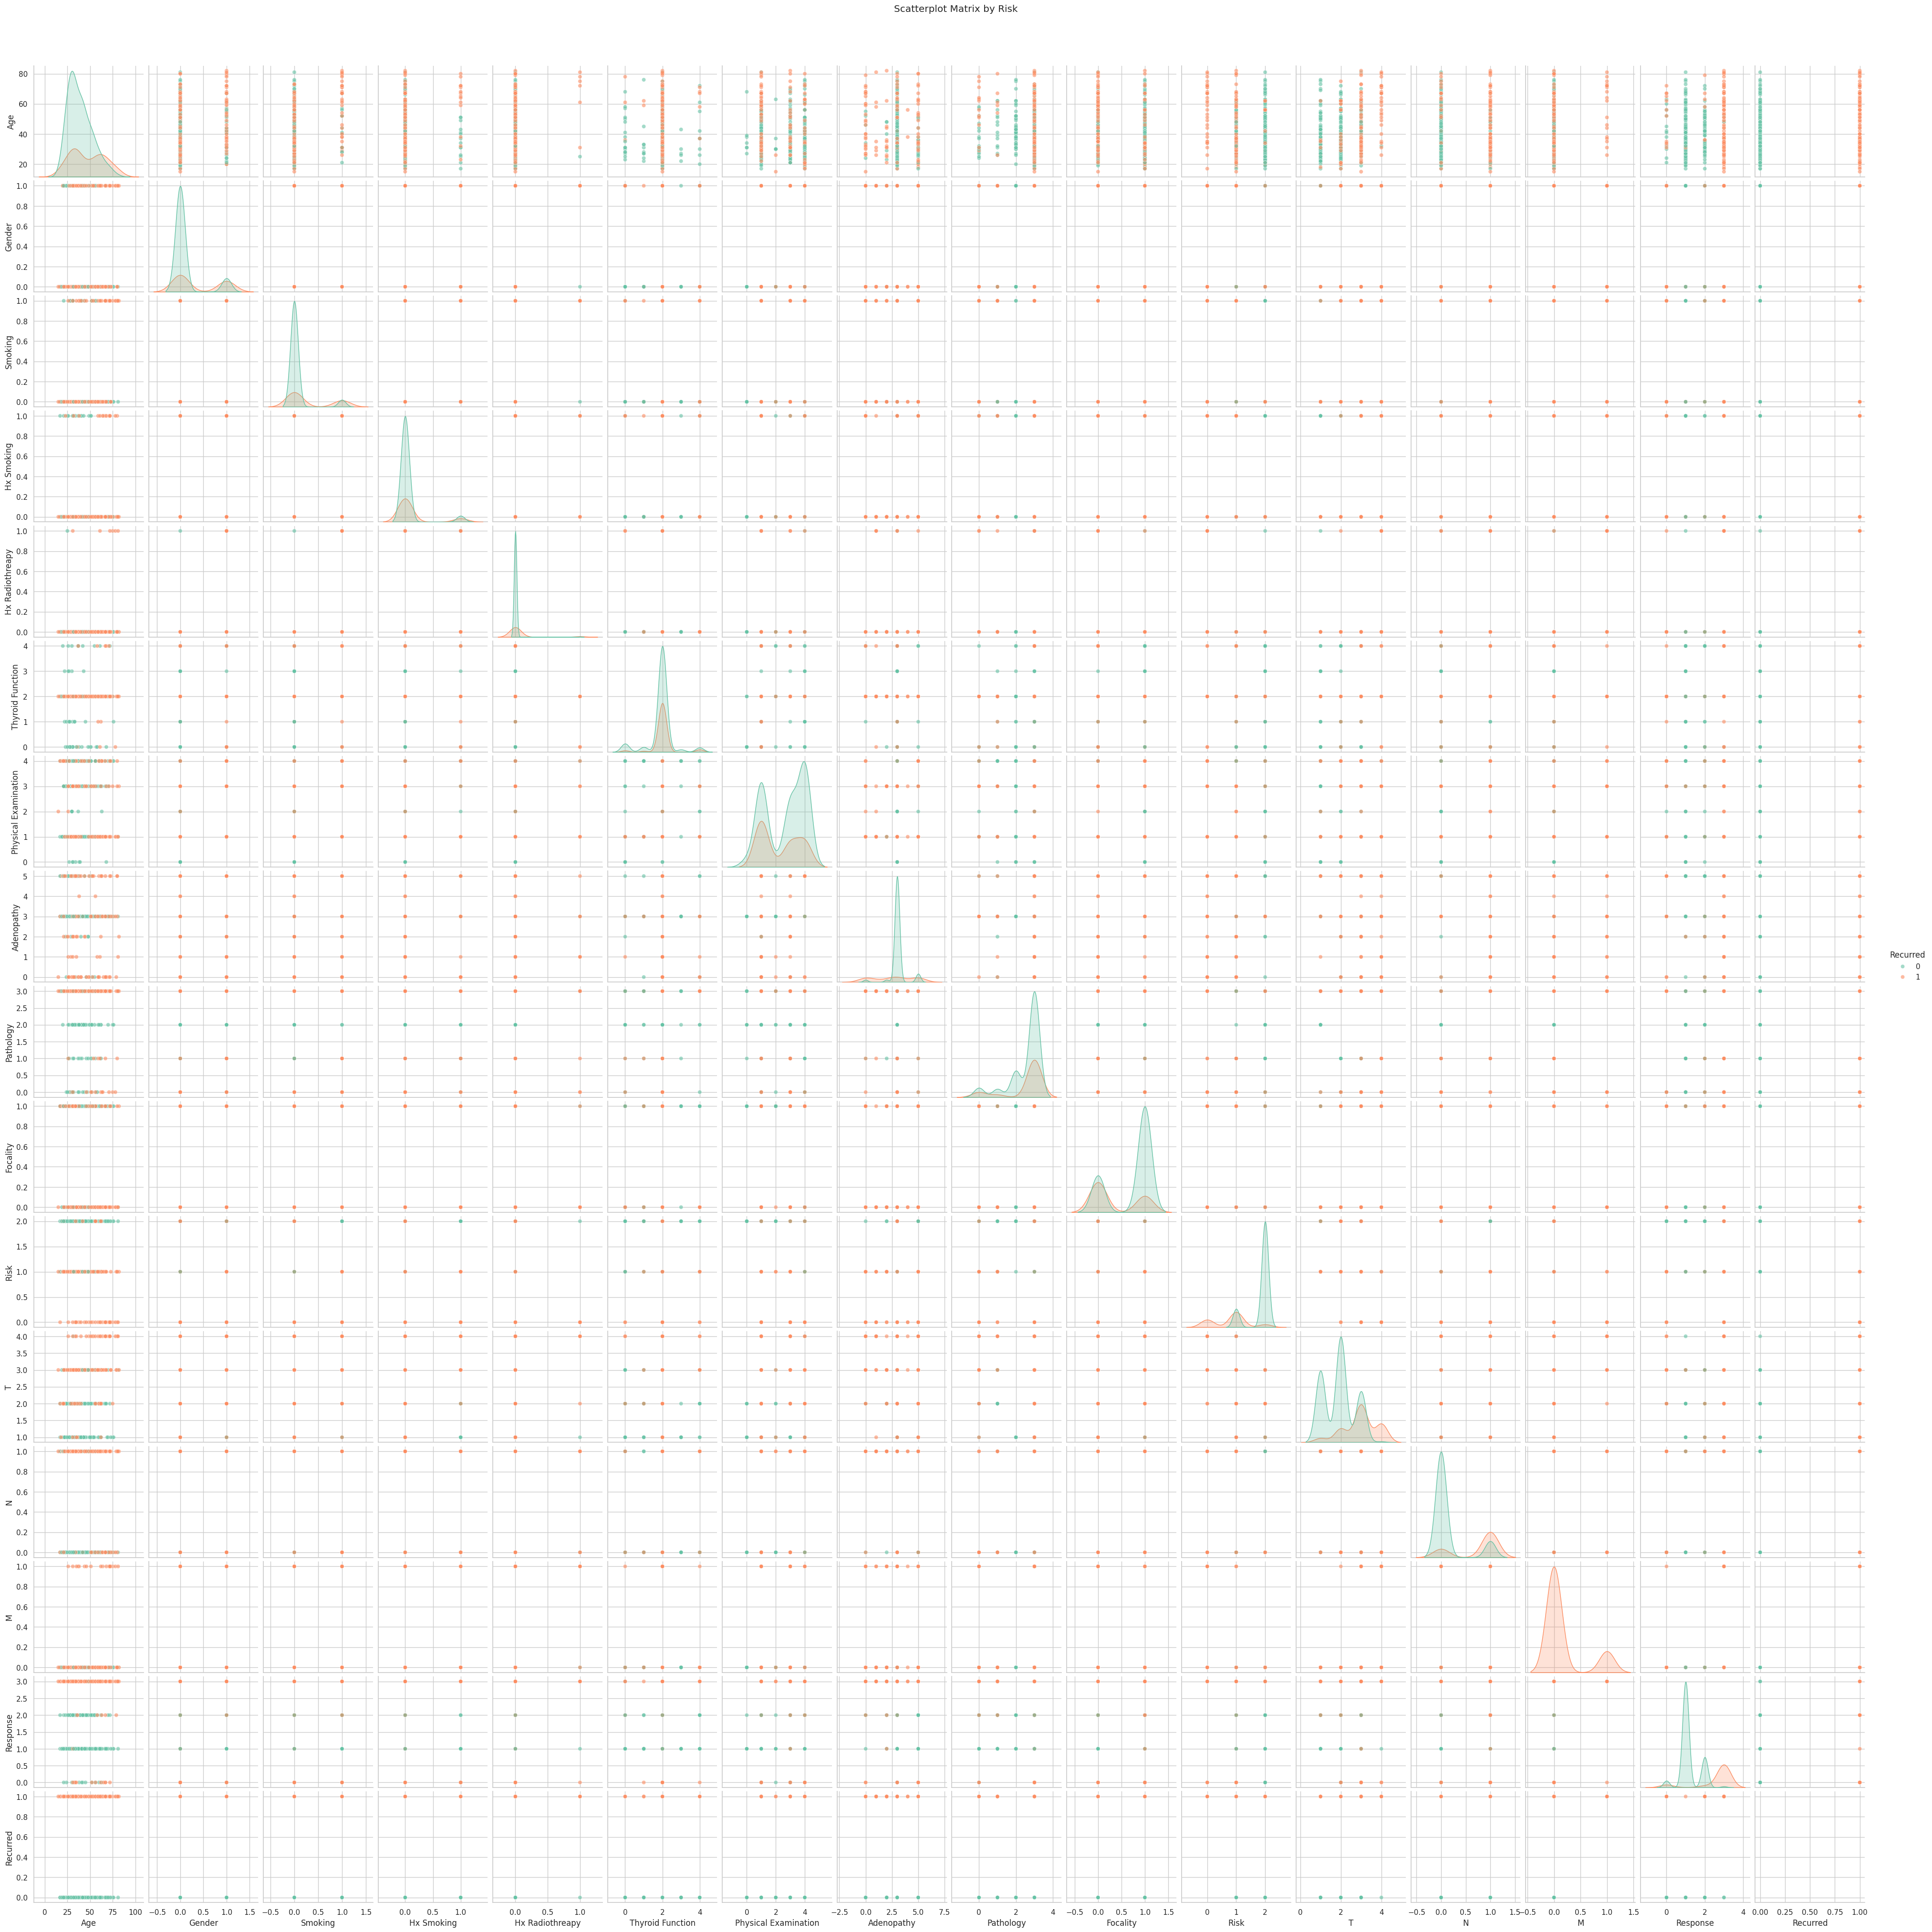

In [ ]:
# Scatterplot Matrix dengan pewarnaan berdasarkan 'Risk'
sns.pairplot(
    data=data_viz.dropna(subset=quantitative_cols + ['Recurred']),
    vars=quantitative_cols,
    hue='Recurred',
    palette='Set2',
    plot_kws={'alpha': 0.6}  # transparansi titik
)

plt.suptitle("Scatterplot Matrix by Risk", y=1.02)
plt.show()

Multivariate visualization : Quantitative vs. Categorical

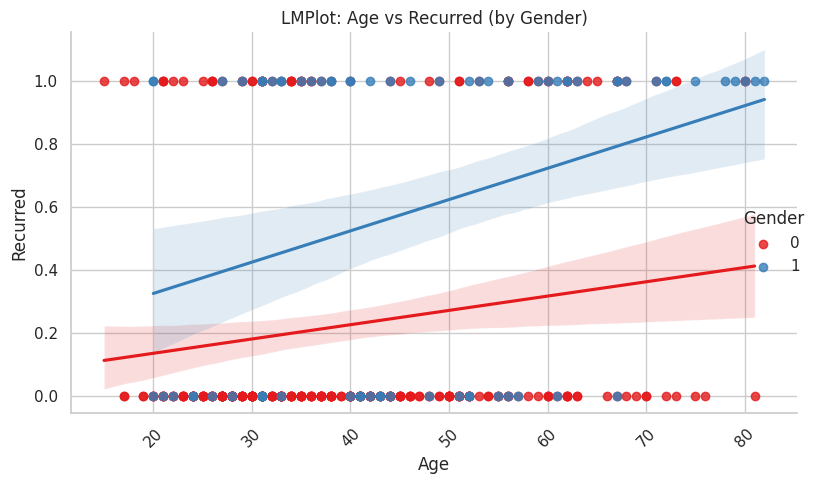

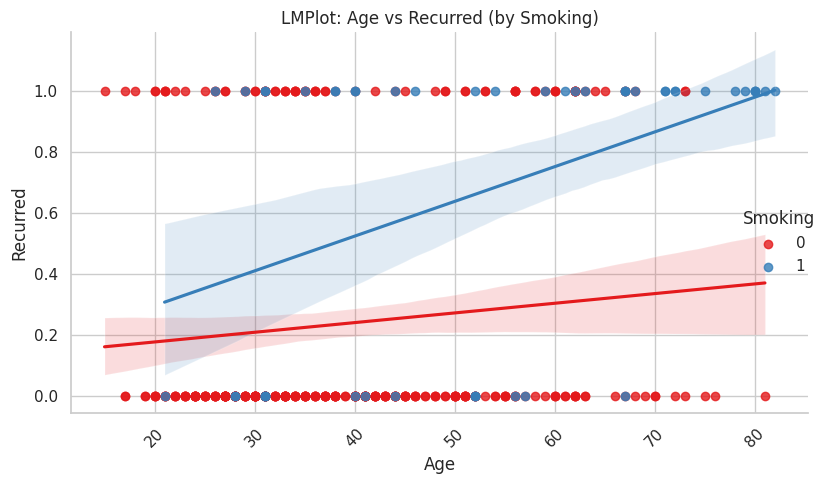

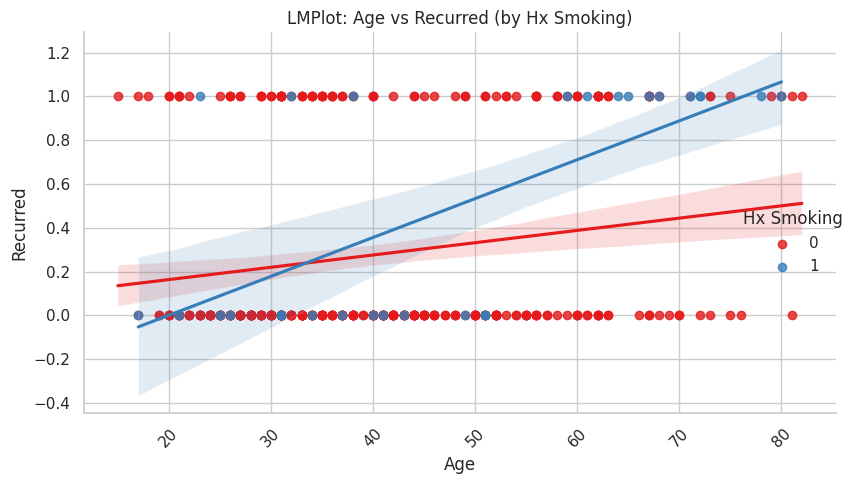

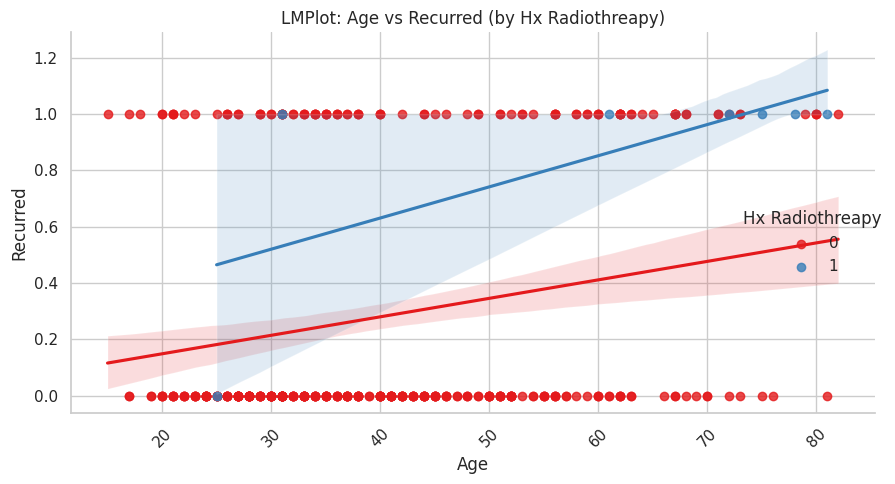

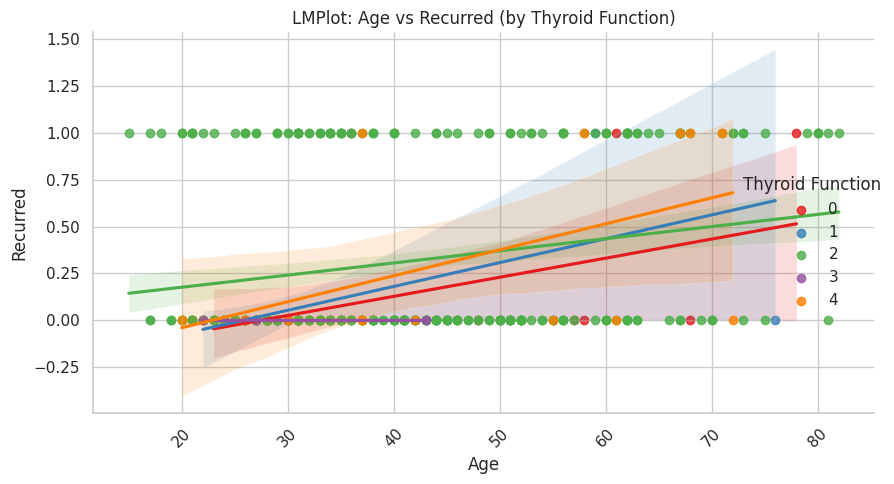

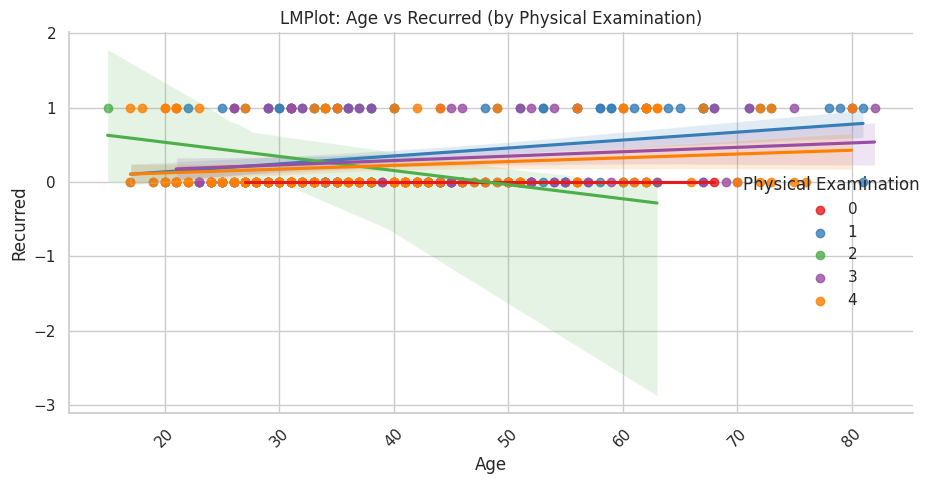

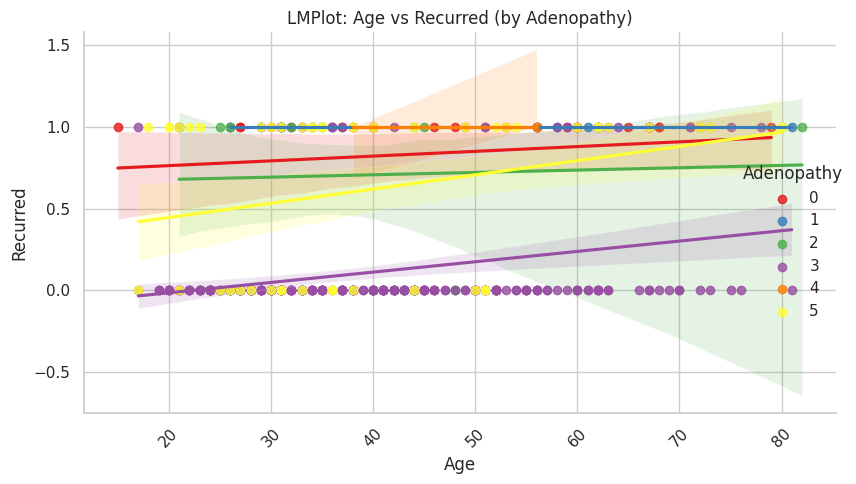

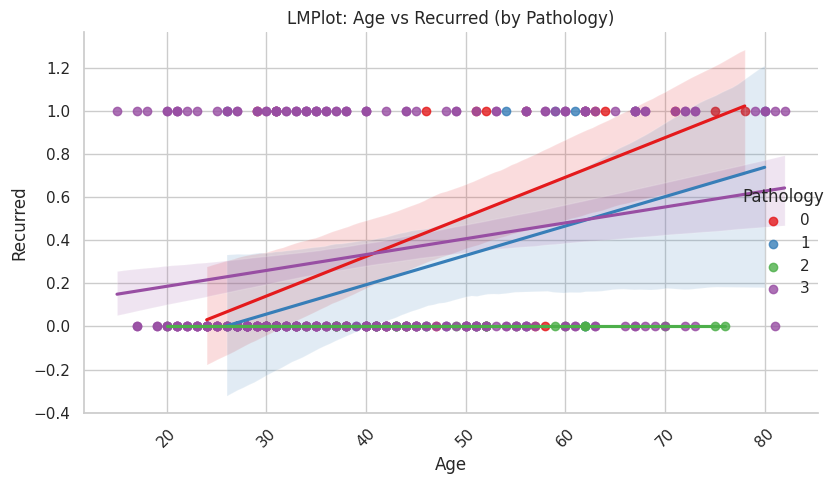

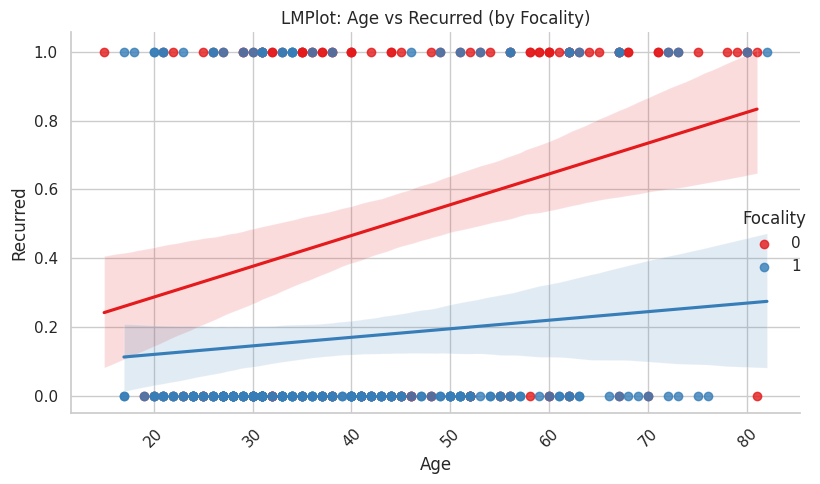

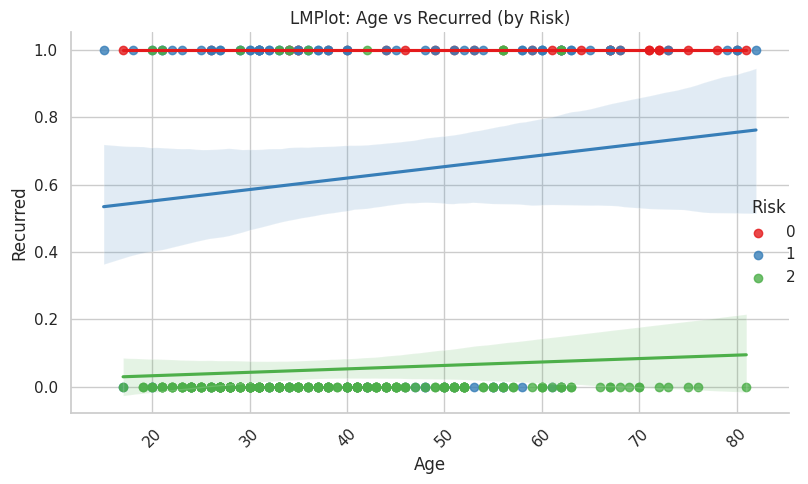

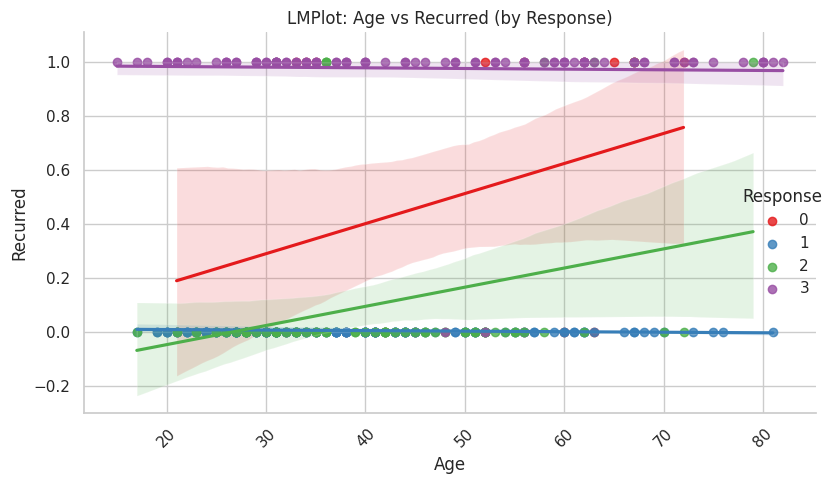

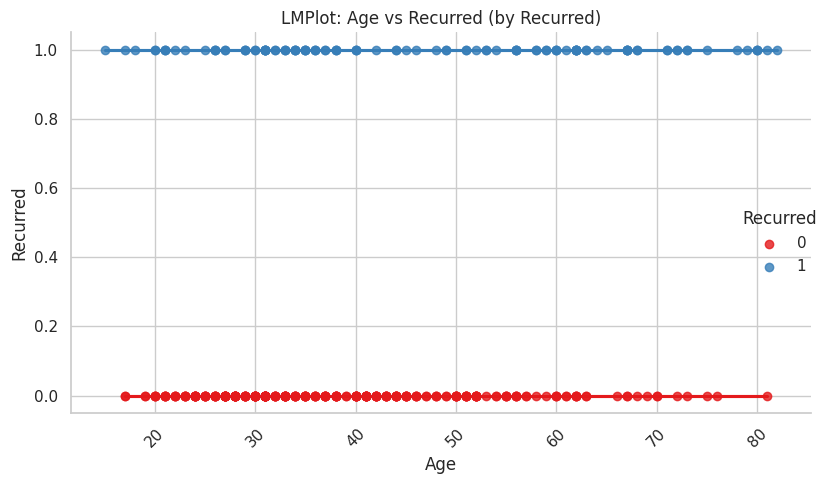

In [ ]:
# Daftar kolom kategorikal
categorical_cols = [
    'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function',
    'Physical Examination', 'Adenopathy', 'Pathology', 'Focality',
    'Risk', 'Response', 'Recurred'
]

# Plot LMPlot untuk setiap kolom kategorikal
for col in categorical_cols:
    sns.lmplot(data=data_viz, x="Age", y="Recurred", hue=col, aspect=1.5, palette="Set1")
    plt.title(f"LMPlot: Age vs Recurred (by {col})")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

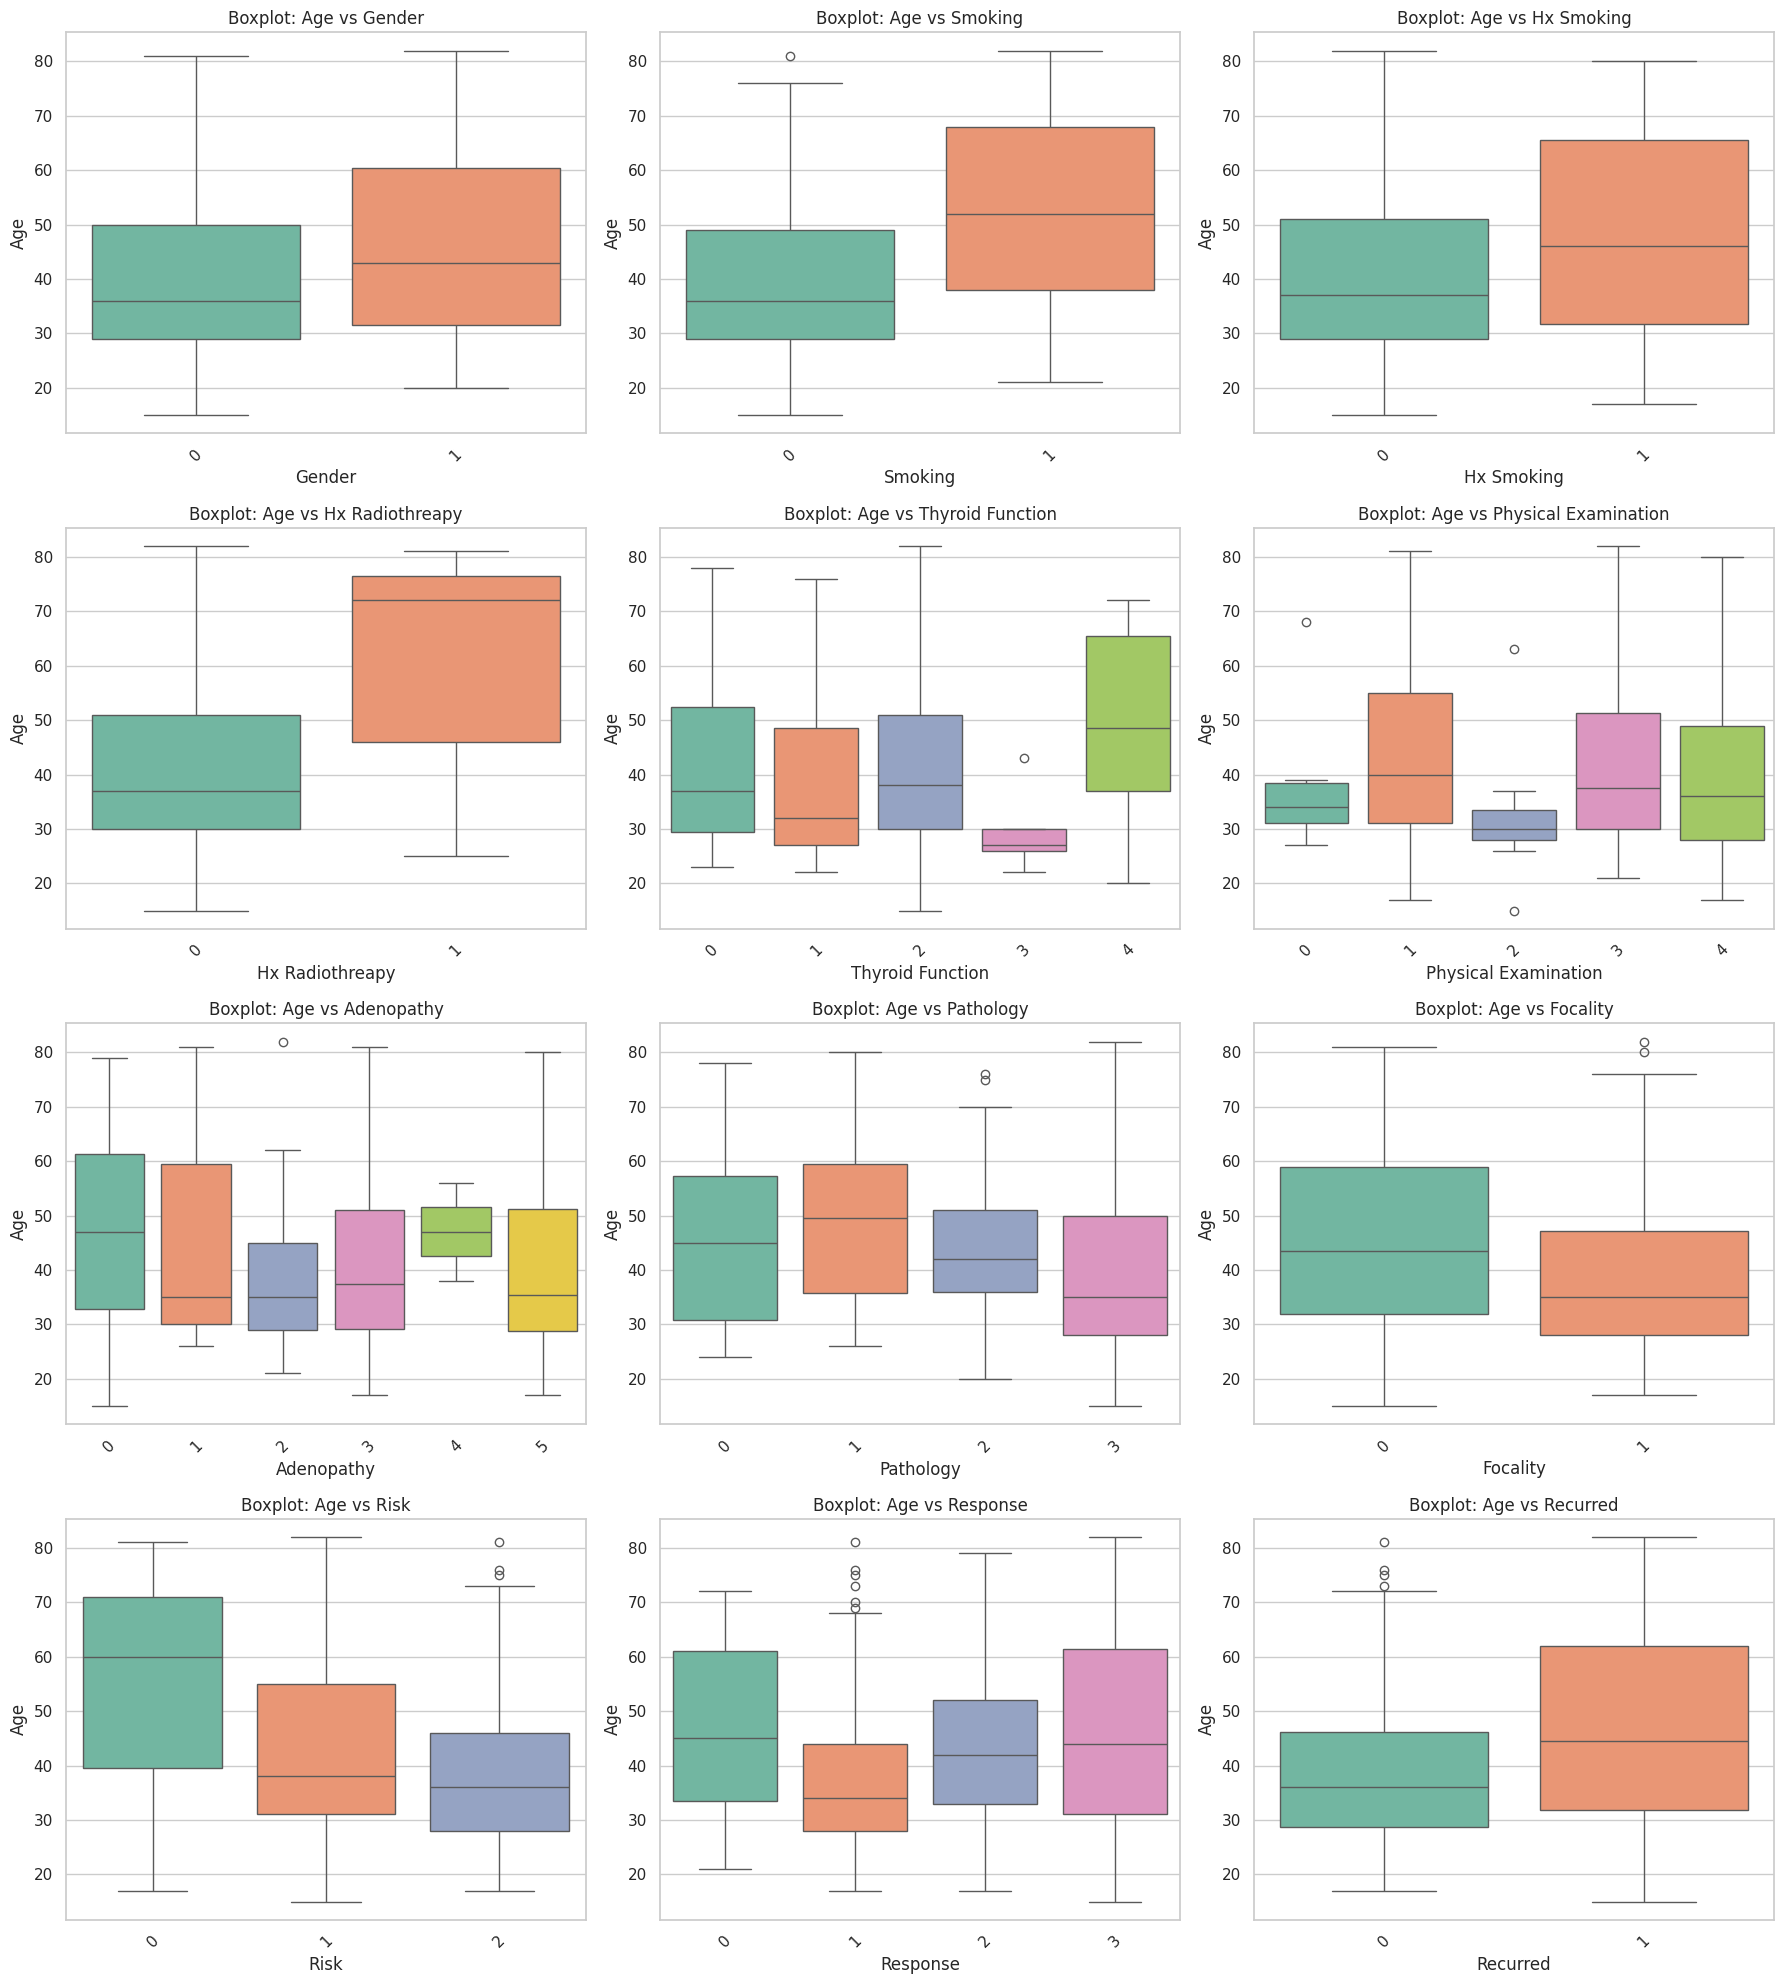

In [ ]:
# Daftar kolom kategorikal untuk dibandingkan dengan 'Age'
categorical_cols = [
    'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function',
    'Physical Examination', 'Adenopathy', 'Pathology', 'Focality',
    'Risk', 'Response', 'Recurred'
]

# Warna palette bisa disesuaikan, misalnya gunakan satu palette untuk semua
palette = 'Set2'  # Bisa diganti jadi 'pastel', 'coolwarm', atau lainnya

# Ukuran plot: menyesuaikan jumlah kolom
n_cols = 3
n_rows = -(-len(categorical_cols) // n_cols)  # ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))

# Flatten axes untuk looping yang mudah
axes = axes.flatten()

# Loop untuk membuat boxplot
for i, col in enumerate(categorical_cols):
    sns.boxplot(x=col, y="Age", data=data_viz, ax=axes[i], palette=palette)
    axes[i].set_title(f"Boxplot: Age vs {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Hilangkan subplot kosong (jika ada)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Multivariate visualization : Categorical vs. Categorical

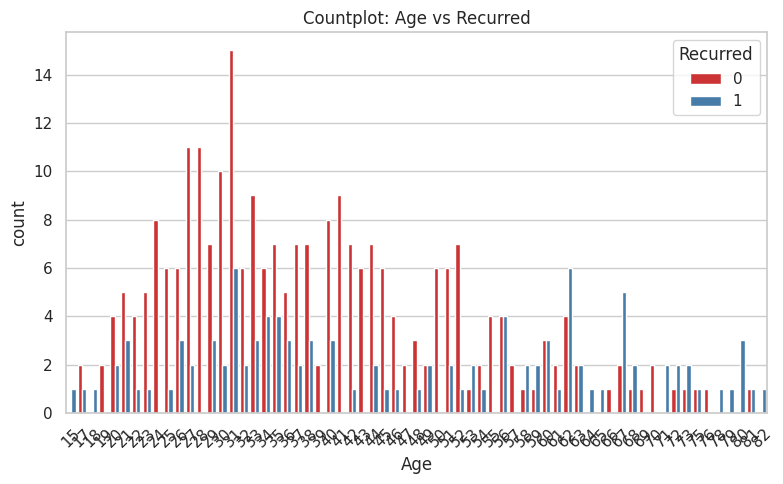

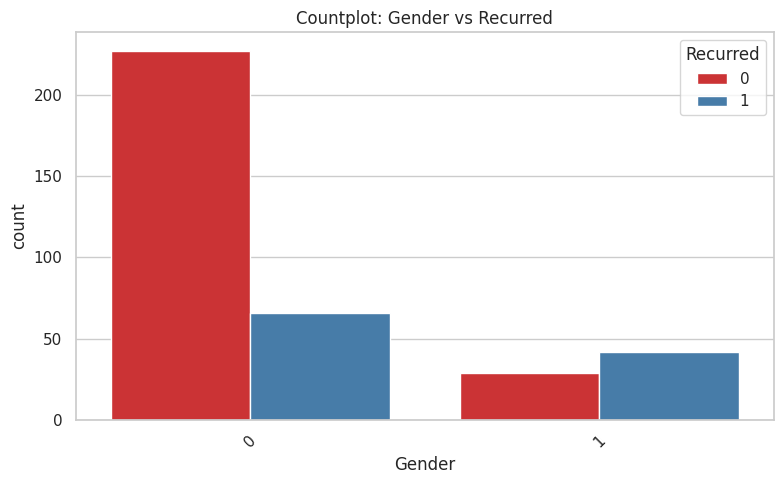

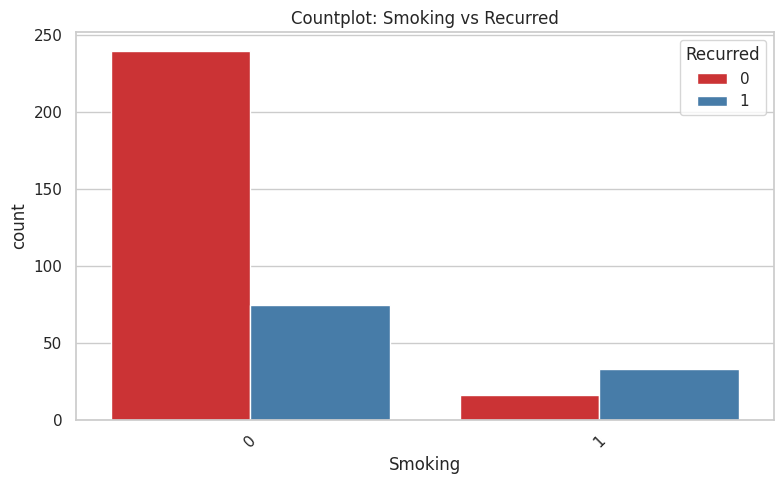

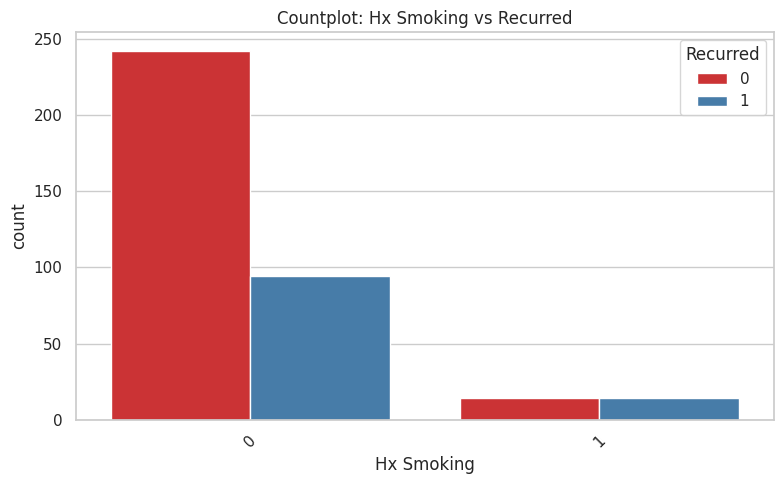

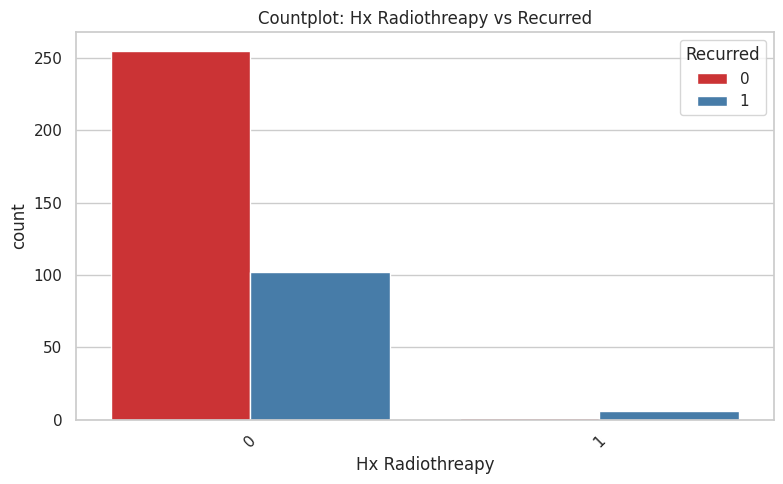

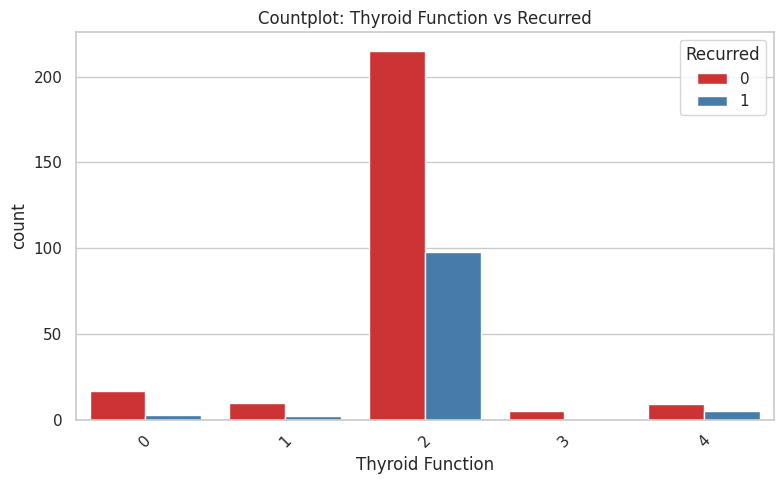

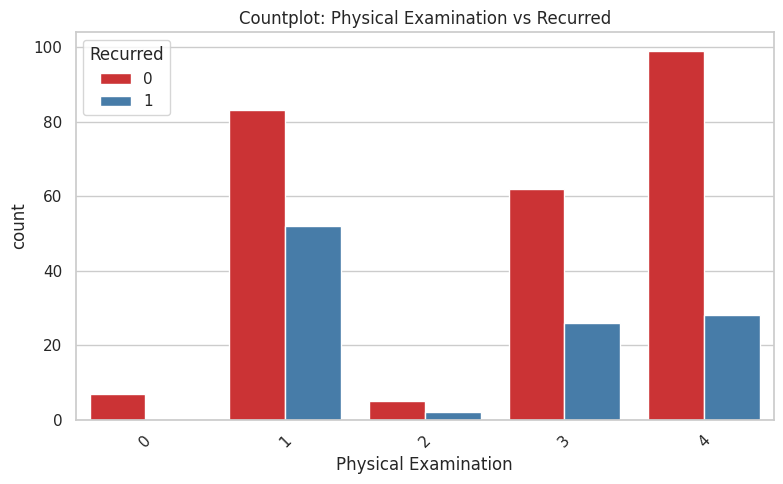

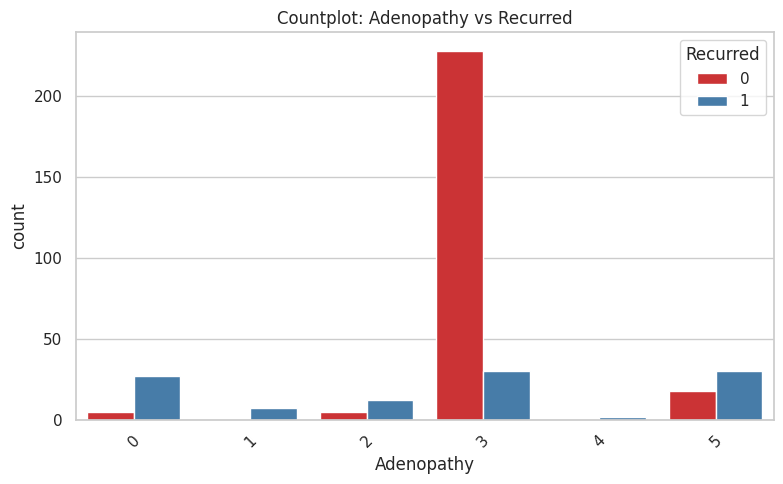

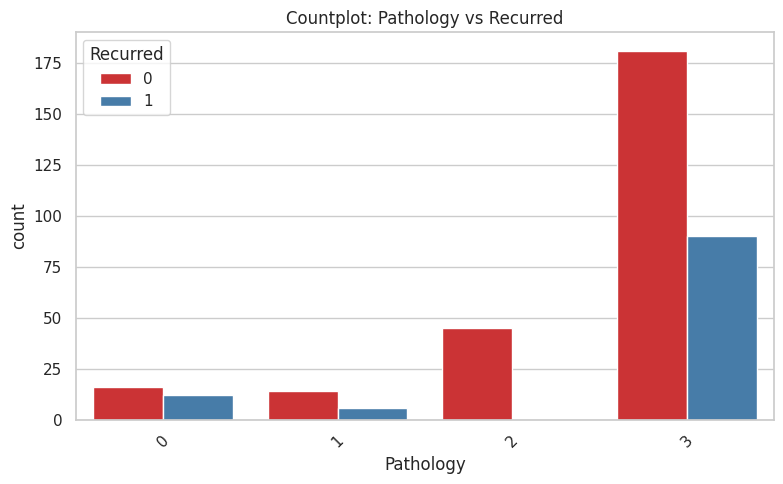

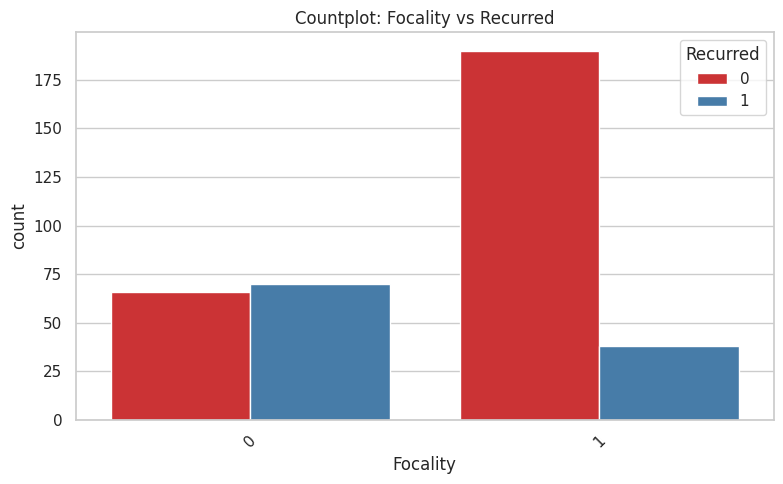

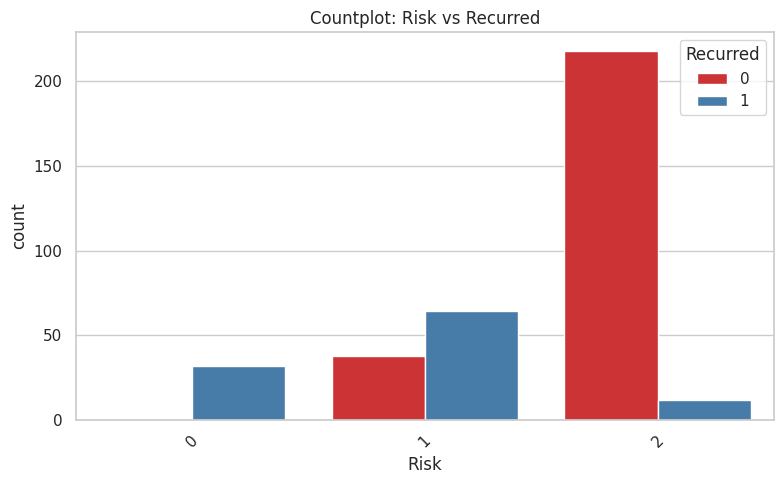

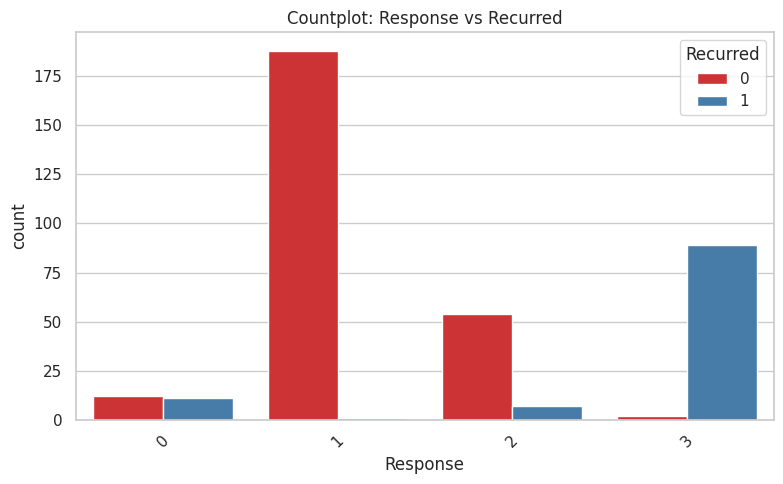

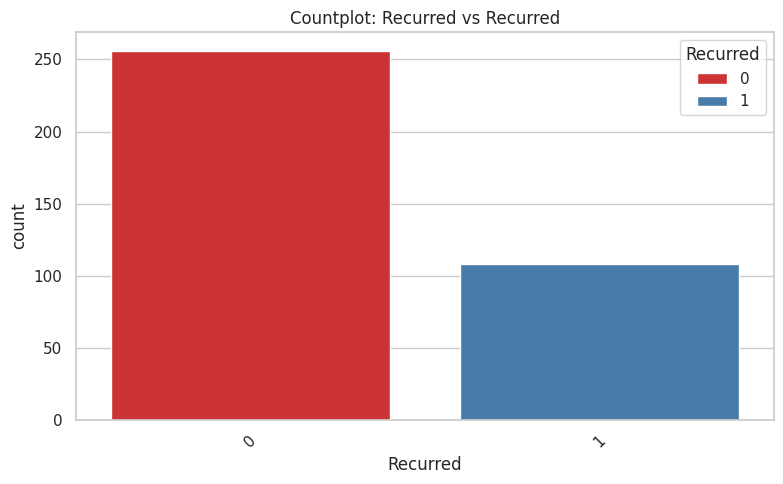

In [ ]:
# Kolom kategorikal (kecuali 'Age' karena bukan untuk countplot)
categorical_cols = [
    'Age','Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function',
    'Physical Examination', 'Adenopathy', 'Pathology', 'Focality',
    'Risk', 'Response', 'Recurred'
]

# Buat countplot untuk tiap fitur dengan hue='Risk'
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue="Recurred", data=data_viz, palette="Set1")
    plt.title(f"Countplot: {col} vs Recurred")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
for i, col in enumerate(categorical_cols):
    if data_viz[col].notnull().sum() == 0:
        print(f"Skipping {col} karena semua nilainya kosong.")
        continue
    sns.countplot(x=col, hue="Recurred", data=data_viz, palette="Set1", ax=axes[i])
    axes[i].set_title(f"{col} vs Recurred")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

Kolom 'Stage' kosong, akan dilewati dari plot.
Skipping plot for Stage vs Risk karena datanya kosong.


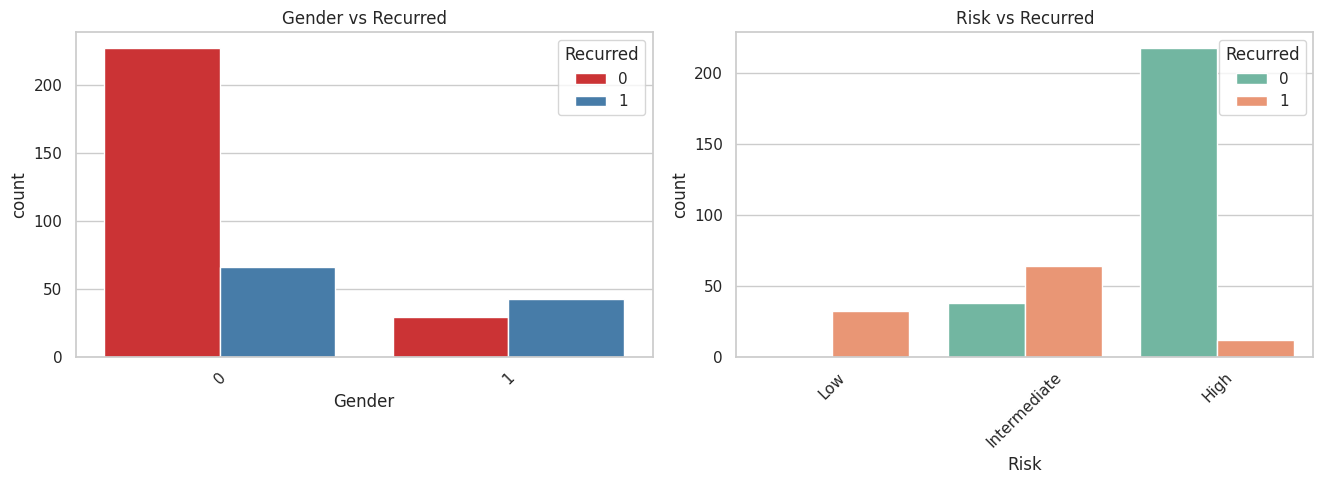

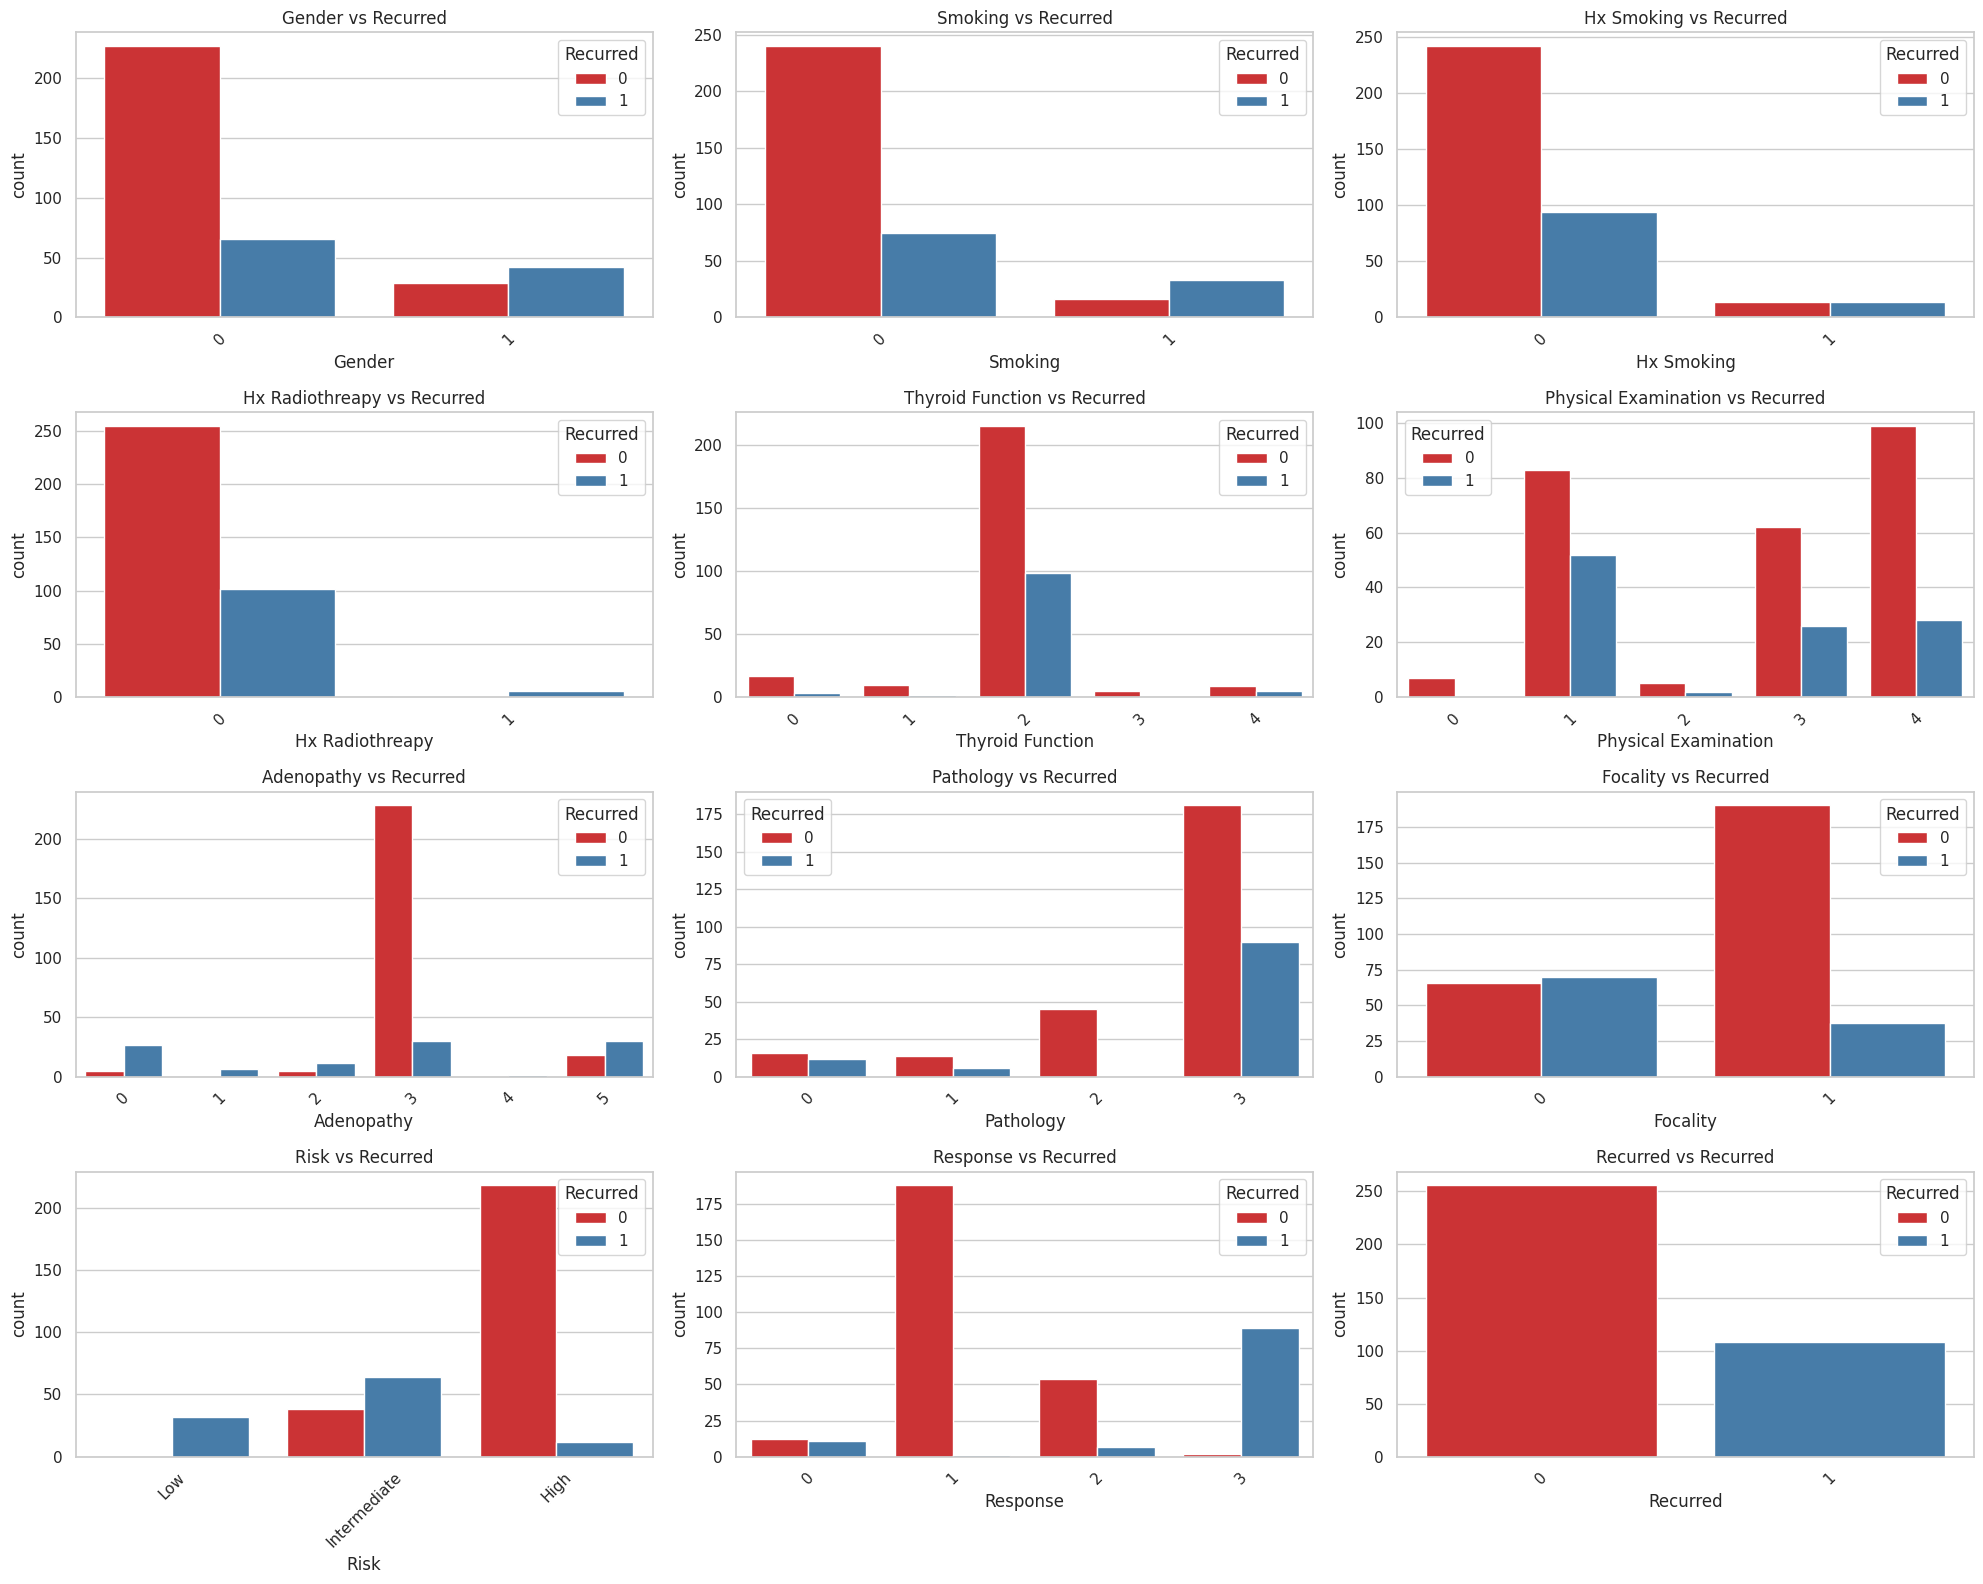

In [ ]:
# --- Preprocessing untuk kolom Stage & Risk ---
# Ganti None/NaN di 'Stage' dengan placeholder agar tetap bisa divisualisasikan (opsional)
if data_viz['Stage'].notnull().sum() == 0:
    print("Kolom 'Stage' kosong, akan dilewati dari plot.")

# Mapping numerik ke kategori untuk 'Risk'
if data_viz['Risk'].dtype in ['int64', 'float64']:
    risk_mapping = {0: 'Low', 1: 'Intermediate', 2: 'High'}
    data_viz['Risk'] = data_viz['Risk'].map(risk_mapping)
    data_viz['Risk'] = pd.Categorical(data_viz['Risk'], categories=['Low', 'Intermediate', 'High'], ordered=True)

# --- Subplot khusus pasangan variabel ---
cat_pairs = [('Gender', 'Recurred'), ('Risk', 'Recurred'), ('Stage', 'Risk')]
palettes = ['Set1', 'Set2', 'coolwarm']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for ax, (pair, palette) in zip(axes, zip(cat_pairs, palettes)):
    x, hue = pair
    # Cek apakah kolom tersedia dan tidak kosong
    if x in data_viz.columns and hue in data_viz.columns:
        if data_viz[x].notnull().sum() > 0 and data_viz[hue].notnull().sum() > 0:
            sns.countplot(x=x, hue=hue, data=data_viz, ax=ax, palette=palette)
            ax.set_title(f"{x} vs {hue}")
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        else:
            ax.set_visible(False)
            print(f"Skipping plot for {x} vs {hue} karena datanya kosong.")
    else:
        ax.set_visible(False)
        print(f"Skipping plot for {x} vs {hue} karena kolom tidak ditemukan.")

plt.tight_layout()
plt.show()

# --- Subplot untuk semua fitur kategorikal (kecuali Age) ---
categorical_cols = [
    'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function',
    'Physical Examination', 'Adenopathy', 'Pathology', 'Focality',
    'Risk', 'Response', 'Recurred'
]

# Filter kolom yang tidak kosong
valid_cols = [col for col in categorical_cols if data_viz[col].notnull().sum() > 0]

n_cols = 3
n_rows = -(-len(valid_cols) // n_cols)  # pembulatan ke atas

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(valid_cols):
    sns.countplot(x=col, hue="Recurred", data=data_viz, palette="Set1", ax=axes[i])
    axes[i].set_title(f"{col} vs Recurred")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hapus subplot kosong (jika ada)
for j in range(len(valid_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()